100%|██████████| 6.74M/6.74M [00:01<00:00, 5.95MB/s]



0: 448x640 1 car, 291.1ms
Speed: 16.3ms preprocess, 291.1ms inference, 34.3ms postprocess per image at shape (1, 3, 448, 640)
Class 2 (0.82)


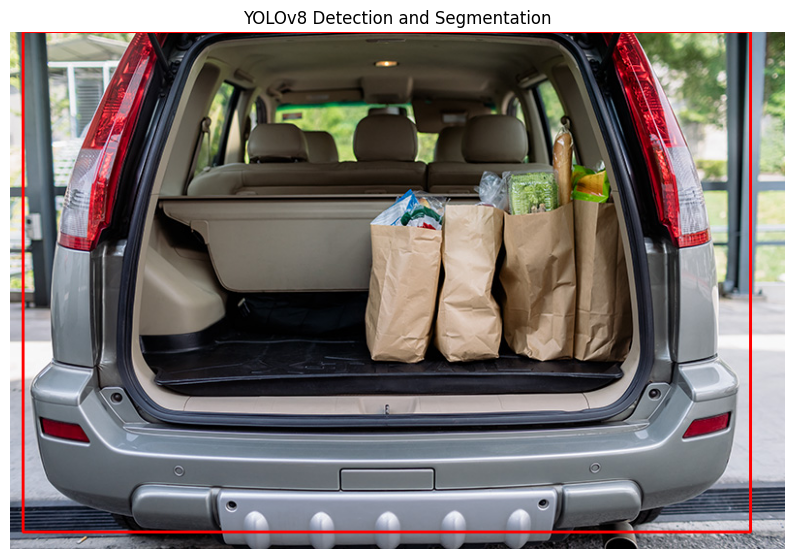

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Step 1: Load YOLOv8 Model
def load_yolov8_model(model_path="yolov8n-seg.pt"):
    """
    Load a YOLOv8 segmentation model.
    
    Args:
        model_path (str): Path to the YOLOv8 model checkpoint.
        
    Returns:
        YOLO: Loaded YOLO model.
    """
    model = YOLO(model_path)  # Load the YOLO model
    return model

# Step 2: Perform Object Detection and Segmentation
def detect_and_segment(model, image_path, conf_threshold=0.5):
    """
    Perform object detection and segmentation on an image using YOLOv8.
    
    Args:
        model (YOLO): Loaded YOLO model.
        image_path (str): Path to the input image.
        conf_threshold (float): Confidence threshold for predictions.
        
    Returns:
        dict: Detection results including bounding boxes, masks, and classes.
        np.ndarray: Original image with overlayed results.
    """
    # Load and process the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    
    # Perform inference
    results = model(image, conf=conf_threshold)
    
    # Extract data
    detections = results[0]
    boxes = detections.boxes.xyxy.cpu().numpy()  # Bounding boxes
    scores = detections.boxes.conf.cpu().numpy()  # Confidence scores
    classes = detections.boxes.cls.cpu().numpy()  # Class IDs
    masks = detections.masks.data.cpu().numpy() if detections.masks else None  # Segmentation masks
    
    # Draw results on the image
    output_image = image.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        color = (255, 0, 0)
        label = f"Class {int(classes[i])} ({scores[i]:.2f})"
        print(label)
        cv2.rectangle(output_image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(output_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    return {
        "boxes": boxes,
        "scores": scores,
        "classes": classes,
        "masks": masks,
    }, output_image

# Step 3: Visualize Results
def visualize_results(image, detections):
    """
    Visualize detection results including bounding boxes and masks.
    
    Args:
        image (np.ndarray): Original image with overlayed results.
        detections (dict): Detection results from YOLOv8.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.title("YOLOv8 Detection and Segmentation")
    plt.show()

# Main Script
if __name__ == "__main__":
    model_path = "yolov8n-seg.pt"  # Use 'yolov8n-seg.pt', 'yolov8s-seg.pt', etc.
    # image_path = "D:\OTH Amberg\Study\sem-1\AI Project\Project setup\image.png"  # Replace with the path to your image
    image_path = "groceries.jpg"
    
    # Load model and detect objects
    model = load_yolov8_model(model_path)
    detections, output_image = detect_and_segment(model, image_path)
    
    # Visualize results
    visualize_results(output_image, detections)


In [12]:
import whisper
import cv2
from moviepy.editor import VideoFileClip
from transformers import pipeline
import torch

# Initialize Whisper Model for Transcription
def load_whisper_model(model_size="base"):
    # Load Whisper model
    model = whisper.load_model(model_size)
    return model

# Extract Audio from Video
def extract_audio_from_video(video_path, audio_output_path="audio.wav"):
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_output_path)
    print(f"Audio extracted to {audio_output_path}")
    return audio_output_path

# Transcribe Audio to Text using Whisper
def transcribe_audio(whisper_model, audio_path):
    result = whisper_model.transcribe(audio_path)
    transcript = result["text"]
    print("Transcript generated.")
    print(transcript)
    return transcript

# Summarize Transcript using Hugging Face Transformers
def summarize_text(text, max_length=150, min_length=50):
    # Load summarization pipeline (using BART here, but T5 or other models are also possible)
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=0 if torch.cuda.is_available() else -1)
    summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
    print("Summary generated.")
    return summary[0]["summary_text"]

# Extract Key Frames from Video using OpenCV
def extract_key_frames(video_path, frame_sample_rate=30):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0
    
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
        # Save frame at every `frame_sample_rate` interval
        if frame_count % frame_sample_rate == 0:
            frames.append(frame)
        frame_count += 1

    cap.release()
    print(f"{len(frames)} frames extracted from the video.")
    return frames

# Main function to run the video summarization pipeline
def video_summarization_pipeline(video_path):
    # Step 1: Load Whisper Model
    whisper_model = load_whisper_model()

    # Step 2: Extract Audio from Video
    audio_path = extract_audio_from_video(video_path)

    # Step 3: Transcribe Audio to Text
    transcript = transcribe_audio(whisper_model, audio_path)

    # Step 4: Summarize Transcript
    summary = summarize_text(transcript, max_length=100)

    # Step 5 (Optional): Extract Key Frames for Additional Visual Insights
    frames = extract_key_frames(video_path)

    # Display the summary
    print("\nVideo Summary:")
    print(summary)

    # Return summary and frames for potential further analysis
    return summary, frames

# Run the pipeline on an example video
video_path = "sample_video_2.mp4"  # Replace with the path to your video file
summary, frames = video_summarization_pipeline(video_path)


MoviePy - Writing audio in audio.wav


MoviePy - Done.
Audio extracted to audio.wav


KeyboardInterrupt: 

In [ ]:
import cv2

# Create a named window for displaying the video feed
cv2.namedWindow("Camera Feed", cv2.WINDOW_NORMAL)  # WINDOW_NORMAL allows resizing

# Open the camera (0 is the default camera)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

print("Camera is open. Press 'q' to close the window.")

# Loop to capture and display video frames
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Display the video feed in the named window
    cv2.imshow("Camera Feed", frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and destroy the window
cap.release()
cv2.destroyAllWindows()


Camera is open. Press 'q' to close the window.


: 

In [1]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8x.pt")
results = model.predict(source="0", show=True )

print(results)



1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 2 bottles, 1 toothbrush, 1478.8ms
0: 480x640 1 person, 2 bottles, 1179.5ms
0: 480x640 1 person, 2 bottles, 1020.6ms
0: 480x640 1 person, 3 bottles, 1075.3ms
0: 480x640 2 persons, 3 bottles, 1109.3ms
0: 480x640 1 person, 2 bottles, 1328.2ms
0: 480x640 1 person, 3 bottles, 1431.9ms
0: 480x640 1 person, 2 bottles, 1198.6ms
0: 480x640 1 person, 2 bottles, 1241.2ms
0: 480x640 

KeyboardInterrupt: 

In [2]:
import cv2
import os
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

def setup_blip():
    """
    Sets up the BLIP model and processor.
    Returns:
        processor (BlipProcessor): Preprocessing pipeline for images.
        model (BlipForConditionalGeneration): BLIP model for caption generation.
    """
    print("Loading BLIP model and processor...")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    print("BLIP model loaded successfully.")
    return processor, model

def generate_caption(processor, model, frame):
    """
    Generates a caption for a given frame using the BLIP model.
    
    Args:
        processor (BlipProcessor): BLIP processor for input preparation.
        model (BlipForConditionalGeneration): BLIP model for caption generation.
        frame (numpy.ndarray): Frame from the video feed.

    Returns:
        str: Generated caption.
    """
    # Convert the frame to a PIL Image
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    # Preprocess and generate the caption
    inputs = processor(images=image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

def main():
    """
    Main function to capture video feed and generate real-time captions.
    """
    # Setup BLIP
    processor, model = setup_blip()

    # Initialize webcam
    cap = cv2.VideoCapture(0)  # 0 for default camera
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return
    
    print("Press 'q' to quit the application.")
    frame_count = 0  # To track frame count for file naming
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Generate caption for the current frame
        caption = generate_caption(processor, model, frame)

        # Save the current frame to a file
        output_folder = "captured_frames"
        frame_filename = os.path.join(output_folder, f"output_frame_{frame_count}.jpg")

        # frame_filename = f"output_frame_{frame_count}.jpg"
        cv2.imwrite(frame_filename, frame)
        print(f"Frame saved as {frame_filename}")

        # Optionally display the caption on the frame (optional, can still use Matplotlib if needed)
        cv2.putText(frame, caption, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Real-Time Scene Understanding", frame)

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        # Increment frame count for unique filenames
        frame_count += 1

    # Release resources
    cap.release()
    cv2.destroyAllWindows()
    print("Application closed.")

if __name__ == "__main__":
    main()


Loading BLIP model and processor...
BLIP model loaded successfully.
Press 'q' to quit the application.
Frame saved as captured_frames\output_frame_0.jpg
Frame saved as captured_frames\output_frame_1.jpg
Frame saved as captured_frames\output_frame_2.jpg
Frame saved as captured_frames\output_frame_3.jpg
Frame saved as captured_frames\output_frame_4.jpg
Frame saved as captured_frames\output_frame_5.jpg
Frame saved as captured_frames\output_frame_6.jpg
Frame saved as captured_frames\output_frame_7.jpg
Frame saved as captured_frames\output_frame_8.jpg
Frame saved as captured_frames\output_frame_9.jpg
Frame saved as captured_frames\output_frame_10.jpg
Frame saved as captured_frames\output_frame_11.jpg
Frame saved as captured_frames\output_frame_12.jpg
Frame saved as captured_frames\output_frame_13.jpg
Frame saved as captured_frames\output_frame_14.jpg
Frame saved as captured_frames\output_frame_15.jpg
Frame saved as captured_frames\output_frame_16.jpg
Application closed.


In [ ]:
import os
import cv2
import torch
from PIL import Image
from ultralytics import YOLO  # YOLOv8 library
from transformers import BlipProcessor, BlipForConditionalGeneration

def setup_yolov8():
    """
    Sets up the YOLOv8 model for segmentation and detection.
    Returns:
        model (YOLO): Pre-trained YOLOv8 model.
    """
    print("Loading YOLOv8 model...")
    model = YOLO('yolov8n-seg.pt')  # YOLOv8 segmentation model
    print("YOLOv8 model loaded successfully.")
    return model

def setup_blip():
    """
    Sets up the BLIP model and processor.
    Returns:
        processor (BlipProcessor): Preprocessing pipeline for images.
        model (BlipForConditionalGeneration): BLIP model for caption generation.
    """
    print("Loading BLIP model and processor...")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    print("BLIP model loaded successfully.")
    return processor, model

def generate_caption(processor, model, image):
    """
    Generates a caption for a given image using the BLIP model.
    
    Args:
        processor (BlipProcessor): BLIP processor for input preparation.
        model (BlipForConditionalGeneration): BLIP model for caption generation.
        image (PIL.Image): Image for which the caption is to be generated.

    Returns:
        str: Generated caption.
    """
    # Preprocess and generate the caption
    inputs = processor(images=image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

def process_yolo_output(results, frame, output_folder, frame_count):
    """
    Processes YOLOv8 results to extract and save masked images.
    
    Args:
        results (Results): YOLOv8 output results.
        frame (numpy.ndarray): Original frame.
        output_folder (str): Path to save processed images.
        frame_count (int): Frame count for file naming.

    Returns:
        List[PIL.Image]: List of masked images as PIL Image objects.
    """
    # Access the first result from the list
    result = results[0]

    # Extract bounding boxes and masks
    masked_images = []
    for idx, (box, mask) in enumerate(zip(result.boxes.xyxy, result.masks.data)):
        # Convert bounding box coordinates to integers
        x1, y1, x2, y2 = map(int, box.tolist())

        # Convert mask to binary and apply to the frame
        mask = (mask.cpu().numpy() * 255).astype("uint8")  # Convert mask to binary
        roi = frame[y1:y2, x1:x2]
        masked_roi = cv2.bitwise_and(roi, roi, mask=mask[y1:y2, x1:x2])

        # Save masked image
        filename = os.path.join(output_folder, f"frame_{frame_count}_object_{idx}.jpg")
        cv2.imwrite(filename, masked_roi)
        print(f"Saved masked object: {filename}")

        # Convert to PIL Image and append to the list
        masked_images.append(Image.fromarray(cv2.cvtColor(masked_roi, cv2.COLOR_BGR2RGB)))

    return masked_images


def main():
    """
    Main function to capture video feed, perform YOLO segmentation, and generate image descriptions.
    """
    # Setup models
    yolo_model = setup_yolov8()
    processor, blip_model = setup_blip()

    # Specify the folder to save processed images
    output_folder = "processed_frames"
    os.makedirs(output_folder, exist_ok=True)

    # Initialize webcam
    cap = cv2.VideoCapture(0)  # 0 for default camera
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Press 'q' to quit the application.")
    frame_count = 0  # To track frame count for file naming
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Perform segmentation and detection using YOLOv8
        results = yolo_model(frame, conf=0.5, iou=0.4)

        # Process YOLOv8 output to extract masked images
        masked_images = process_yolo_output(results, frame, output_folder, frame_count)

        # Generate captions for each masked image
        for idx, masked_image in enumerate(masked_images):
            caption = generate_caption(processor, blip_model, masked_image)
            print(f"Object {idx + 1}: {caption}")

        # Display the frame with bounding boxes and segmentation masks
        annotated_frame = results[0].plot()
        cv2.imshow("YOLOv8 Segmentation and Detection", annotated_frame)

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_count += 1

    # Release resources
    cap.release()
    cv2.destroyAllWindows()
    print(f"Processed frames and masked images saved in folder: {output_folder}")
    print("Application closed.")

if __name__ == "__main__":
    main()


d:\OTH Amberg\Study\sem-1\AI Project\Project setup\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading YOLOv8 model...
YOLOv8 model loaded successfully.
Loading BLIP model and processor...
BLIP model loaded successfully.
Press 'q' to quit the application.

0: 480x640 1 person, 1 bottle, 307.0ms
Speed: 13.7ms preprocess, 307.0ms inference, 31.0ms postprocess per image at shape (1, 3, 480, 640)
Saved masked object: processed_frames\frame_0_object_0.jpg
Saved masked object: processed_frames\frame_0_object_1.jpg


d:\OTH Amberg\Study\sem-1\AI Project\Project setup\env\lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Object 1: a man with a beard and mustache is shown in this image
Object 2: a bottle of alcohol

0: 480x640 2 persons, 1 bottle, 1053.2ms
Speed: 28.9ms preprocess, 1053.2ms inference, 210.3ms postprocess per image at shape (1, 3, 480, 640)
Saved masked object: processed_frames\frame_1_object_0.jpg
Saved masked object: processed_frames\frame_1_object_1.jpg
Saved masked object: processed_frames\frame_1_object_2.jpg
Object 1: a man with a beard and a white shirt
Object 2: a bottle of water with a red cap
Object 3: a black and white cat with a black tail

0: 480x640 2 persons, 1 bottle, 198.1ms
Speed: 28.9ms preprocess, 198.1ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)
Saved masked object: processed_frames\frame_2_object_0.jpg
Saved masked object: processed_frames\frame_2_object_1.jpg
Saved masked object: processed_frames\frame_2_object_2.jpg
Object 1: a man with a beard and mustache is shown in this image
Object 2: a small stone with a red light on top
Object 3: a bl

AttributeError: 'NoneType' object has no attribute 'data'

: 